# **Bank Note Analysis**



**Data Set Information**:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

**Attribute Information:**

variance of Wavelet Transformed image (continuous)
skewness of Wavelet Transformed image (continuous)
curtosis of Wavelet Transformed image (continuous)
entropy of image (continuous)
class (integer)
**Dataset: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data**

UCI: http://archive.ics.uci.edu/ml/datasets/banknote+authentication



In [1]:
!pip install pyforest
from pyforest import *

**Can we classify banknote as fake or genuine?**

> Add blockquote





In [2]:
lazy_imports()

['from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.linear_model import RidgeCV',
 'import awswrangler as wr',
 'import bokeh',
 'from sklearn.decomposition import PCA',
 'from sklearn.manifold import TSNE',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.linear_model import Ridge',
 'from pyspark import SparkContext',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.preprocessing import RobustScaler',
 'import matplotlib as mpl',
 'from xlrd import open_workbook',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.preprocessing import LabelEncoder',
 'import spacy',
 'import statsmodels.api as sm',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import torch',
 'import cv2',
 'from PIL import Image',
 'import keras',
 'import sys',
 'from sklearn.linear_model import Lasso',
 'from sklearn.ensemble import RandomForestClassifier',
 'from skl

In [3]:
df = pd.read_csv('/content/BankNote_Authentication.csv')

df.head()

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [5]:
df.shape

(1372, 5)

In [6]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [8]:
 y = df['class']
 X = df.drop('class', axis=1)

**Visualization: Bivariant Analysis


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-9-622347b14c2b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, color='red')


<IPython.core.display.Javascript object>

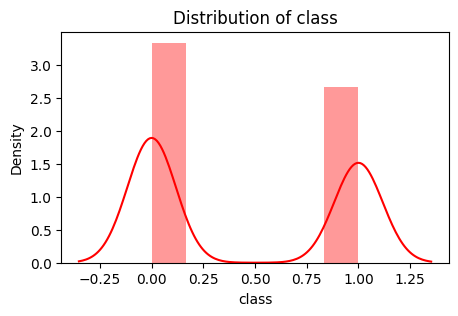

In [9]:
plt.figure(figsize=(5,3))
plt.title('Distribution of class')
sns.distplot(y, color='red')
plt.show()

**Multivariate Data Analysis**

array([[<Axes: title={'center': 'variance'}>,
        <Axes: title={'center': 'skewness'}>,
        <Axes: title={'center': 'curtosis'}>],
       [<Axes: title={'center': 'entropy'}>,
        <Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

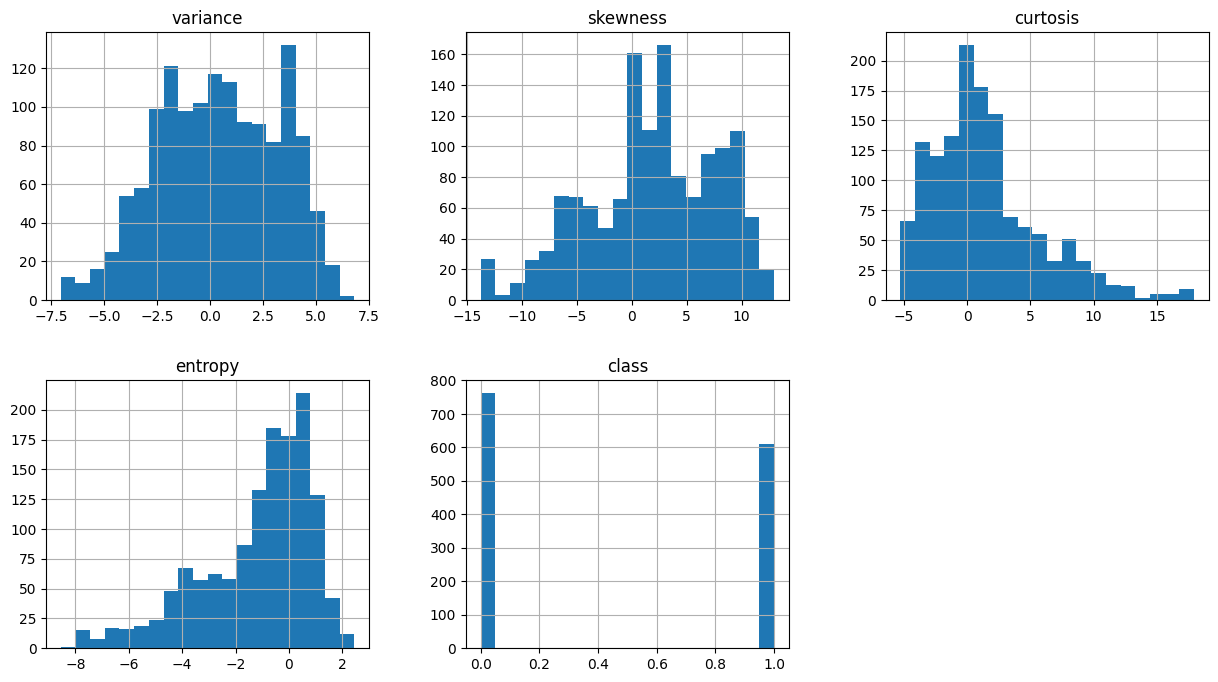

In [10]:
df.hist(bins=20, figsize=(15,8), layout=(2,3))


In [11]:
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

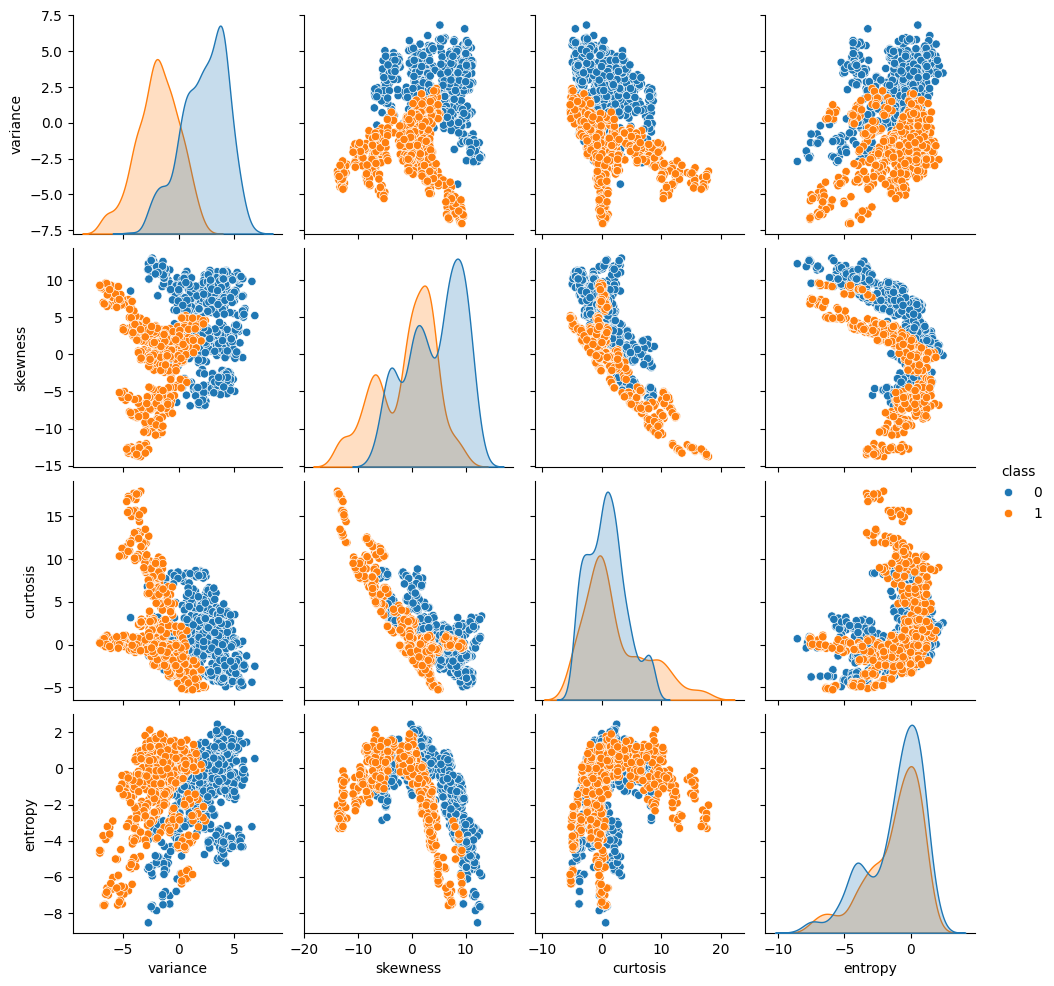

In [12]:
sns.pairplot(df, hue='class')

**Preparing Our Data To Build Our Model**


In [13]:
 y = df['class']
 X = df.drop('class', axis=1)

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)
x_train,x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.20, random_state=1)



In [15]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
y_val.shape

(877, 4)
(275, 4)
(220, 4)
(877,)


(220,)

**Scaling Our Data**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_val = scaler.transform(x_val)

In [17]:
x_train

array([[-1.96371229,  0.94020085, -0.33056524, -2.93495007],
       [-1.46837267, -1.69671406,  2.0424326 ,  0.86601608],
       [-0.85454992, -0.08706624, -0.49795263, -0.04943889],
       ...,
       [-1.28340004,  0.38696061, -0.45369243, -0.3164689 ],
       [ 0.96668088, -0.87837596,  0.85745672,  0.95008321],
       [ 0.6508558 , -0.43315305,  0.93651459,  0.20893391]])

In [18]:
y_train

1157    1
827     1
1178    1
576     0
1263    1
       ..
637     0
984     1
878     1
491     0
209     0
Name: class, Length: 877, dtype: int64

In [19]:
!pip install --upgrade scikit-learn


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


In [22]:
x_train.shape


(877, 4)

In [23]:
y_train.shape

(877,)

In [24]:
lr = lr.fit(x_train, y_train)

In [25]:
lr.predict(x_test)

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [26]:
lr.score(x_test,y_test)

0.9745454545454545

In [27]:
param_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],  # Corrected typos and removed 'newton-cholesky'
    'max_iter': range(100, 151),  # Inclusive range for 100 to 150 iterations
    'multi_class': ['auto', 'ovr', 'multinomial']
}


In [28]:
gs = GridSearchCV(lr,param_grid,cv = 20)

<IPython.core.display.Javascript object>

In [29]:
gs.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=LogisticRegression(),
             param_grid={'max_iter': range(100, 151),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']})

In [30]:
gs.best_params_

{'max_iter': 100, 'multi_class': 'auto', 'solver': 'lbfgs'}

In [31]:
lr = LogisticRegression(max_iter = 100, multi_class = 'auto', solver='lbfgs')


In [32]:
lr.fit(x_train, y_train)

LogisticRegression()

In [33]:
lr.score(x_test, y_test)

0.9745454545454545

In [34]:
lr.score(x_test,y_test)

0.9745454545454545

In [35]:
y_pred = lr.predict(x_test)

This is the best parameters we have used in logisitc *regression* * *italicized text*

**` Confusion Matrix`**





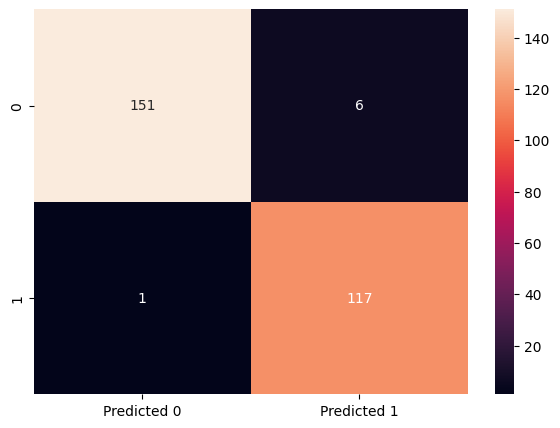

97.45454545454545


In [36]:
from sklearn import metrics
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


cm = metrics.confusion_matrix(y_test, y_pred, labels = [0,1])

df = pd.DataFrame(cm, index = [i for i in [0,1]], columns= [i for i in ['Predicted 0', 'Predicted 1']])
plt.figure(figsize = (7,5))
sns.heatmap(df, annot=True, fmt="d")
plt.show()
acc_score = lr.score(x_test, y_test)
print(acc_score*100)


accuracy_score: 97.45454545454545


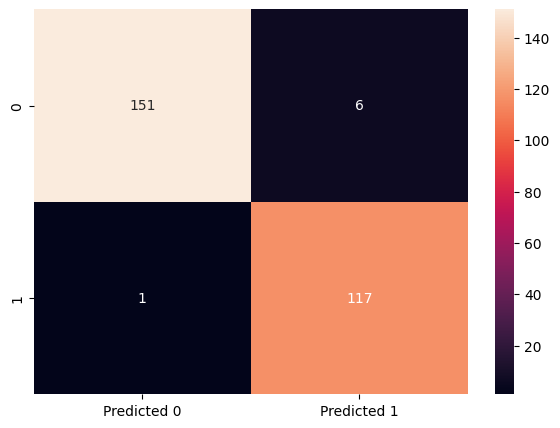

In [37]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
acc_score = lr.score(x_test, y_test)
print('accuracy_score:',acc_score*100)

cm = metrics.confusion_matrix(y_test, y_pred, labels = [0,1])

df = pd.DataFrame(cm, index = [i for i in [0,1]], columns= [i for i in ['Predicted 0', 'Predicted 1']])
plt.figure(figsize = (7,5))
sns.heatmap(df, annot=True, fmt="d")
plt.show()





```
`#** checking with SVM**

```



**Checking with SVM**

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np

svm_classifier = SVC(kernel = 'rbf')
svm_classifier.fit(x_train, y_train)
svm_accuracy = cross_val_score(estimator= svm_classifier, X=x_train, y=y_train, cv=10)

In [39]:
svm_accuracy

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.98850575, 1.        ])

In [40]:
print('mean_accuracy:',svm_accuracy.mean())

mean_accuracy: 0.9988505747126437


In [41]:
y_pred_svm=svm_classifier.predict(x_test)
y_pred_svm

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [42]:
svm_pred = svm_classifier.score(x_test, y_test)
svm_pred

1.0

accuracy_score_svm: 100.0


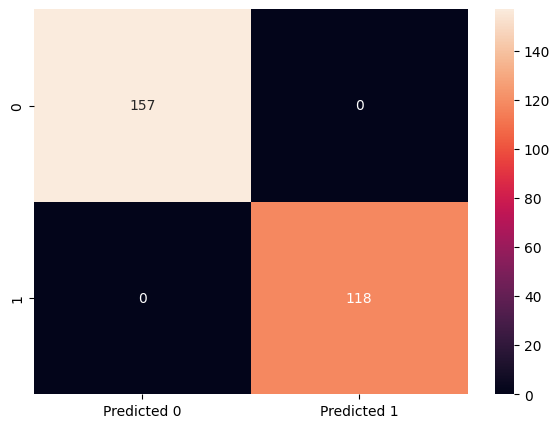

In [69]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
acc_score_svm = svm_classifier.score(x_test, y_test)
print('accuracy_score_svm:',acc_score_svm*100)

cm = metrics.confusion_matrix(y_test,y_pred_svm,labels = [0,1])

df = pd.DataFrame(cm, index = [i for i in [0,1]], columns= [i for i in ['Predicted 0', 'Predicted 1']])
plt.figure(figsize = (7,5))
sns.heatmap(df, annot=True, fmt="d")
plt.show()

 **Random Forest Classifier**

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=0)

rfc_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [46]:
rfc_accuracy = cross_val_score(estimator= rfc_classifier, X=x_train, y=y_train, cv=10)

print('rfc_accuracy:',rfc_accuracy.mean())

rfc_accuracy: 0.990909090909091


rfc_accuracy_score: 100.0


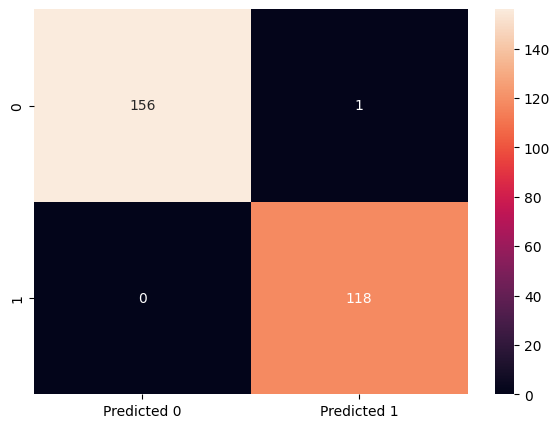

In [74]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_rfc = rfc_classifier.predict(x_test)
rfc_accuracy_score = rfc_classifier.score(x_test, y_test)
print('rfc_accuracy_score:',acc_score*100)

cm = metrics.confusion_matrix(y_test,y_pred_rfc,labels = [0,1])

df = pd.DataFrame(cm, index = [i for i in [0,1]], columns= [i for i in ['Predicted 0', 'Predicted 1']])
plt.figure(figsize = (7,5))
sns.heatmap(df, annot=True, fmt="d")
plt.show()

**KNeighborsClassifier**

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {'leaf_size':[2,5,7,9,11], 'n_neighbors':[2,5,7,9,11], 'p':[1,2]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [49]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [50]:
KNN = KNeighborsClassifier(n_neighbors= 2, p = 1, leaf_size= 2)

In [51]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [52]:
y_pred_knn=KNN.predict(x_test)


In [53]:
knn_accuracy = KNN.score(x_test, y_test)
knn_accuracy

1.0

accuracy_score: 100.0


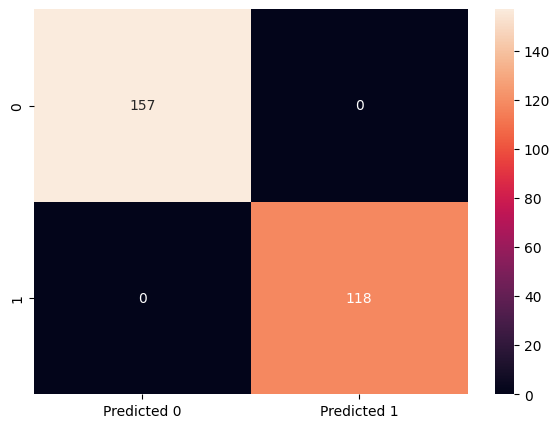

In [54]:
acc_score = KNN.score(x_test, y_test)
print('accuracy_score:',acc_score*100)

cm = metrics.confusion_matrix(y_test,y_pred_knn,labels = [0,1])

df = pd.DataFrame(cm, index = [i for i in [0,1]], columns= [i for i in ['Predicted 0', 'Predicted 1']])
plt.figure(figsize = (7,5))
sns.heatmap(df, annot=True, fmt="d")
plt.show()

# **Multilayer Perception** **

In [55]:
from sklearn.neural_network import MLPClassifier
multi_classifier = MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=8000, alpha=0.0001, solver='sgd', verbose=10, random_state=21, tol=0.000000001)


In [56]:
multi_classifier.fit(x_train,y_train)
multi_pred=multi_classifier.fit(x_train,y_train)


Streaming output truncated to the last 5000 lines.
Iteration 3001, loss = 0.00267347
Iteration 3002, loss = 0.00267245
Iteration 3003, loss = 0.00267116
Iteration 3004, loss = 0.00266977
Iteration 3005, loss = 0.00266865
Iteration 3006, loss = 0.00266749
Iteration 3007, loss = 0.00266633
Iteration 3008, loss = 0.00266511
Iteration 3009, loss = 0.00266381
Iteration 3010, loss = 0.00266275
Iteration 3011, loss = 0.00266138
Iteration 3012, loss = 0.00266036
Iteration 3013, loss = 0.00265899
Iteration 3014, loss = 0.00265771
Iteration 3015, loss = 0.00265683
Iteration 3016, loss = 0.00265575
Iteration 3017, loss = 0.00265421
Iteration 3018, loss = 0.00265290
Iteration 3019, loss = 0.00265184
Iteration 3020, loss = 0.00265051
Iteration 3021, loss = 0.00264907
Iteration 3022, loss = 0.00264783
Iteration 3023, loss = 0.00264658
Iteration 3024, loss = 0.00264582
Iteration 3025, loss = 0.00264427
Iteration 3026, loss = 0.00264302
Iteration 3027, loss = 0.00264180
Iteration 3028, loss = 0.002640

multi_accuracy_score: 1.0


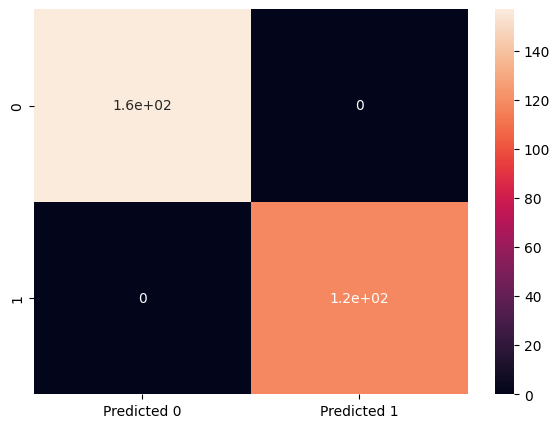

In [72]:
multi_accuracy_score=multi_classifier.score(x_test, y_test)
print('multi_accuracy_score:',multi_accuracy_score)

# Obtain predicted values
multi_pred = multi_classifier.predict(x_test)

# Calculate confusion matrix
cm = metrics.confusion_matrix(y_test, multi_pred, labels=[0, 1])

# Create DataFrame and heatmap
df = pd.DataFrame(cm, index=[i for i in [0, 1]], columns=[i for i in ['Predicted 0', 'Predicted 1']])
plt.figure(figsize=(7, 5))
sns.heatmap(df, annot=True)
plt.show()




**Printing Each Algorithmn and Accuracy Score**

In [75]:
print('Logistic_regression:', acc_score)
print('Support Vector machines',acc_score_svm)
print('RandomForestClassifier',rfc_accuracy_score)
print('Knearestclassifier',knn_accuracy)
print('Perceptron Model',multi_accuracy_score)

Logistic_regression: 1.0
Support Vector machines 1.0
RandomForestClassifier 0.9963636363636363
Knearestclassifier 1.0
Perceptron Model 1.0


**Validating Data through Logistic Regression**


In [78]:
validation_data_pred_lr = lr.predict(x_val)

validation_score_lr = lr.score(x_val,y_val )

print('validation_score_lr:', validation_score_lr)





validation_score_lr: 0.9772727272727273


**Validating Data through Perceptron Model**

In [79]:
validation_data_pred_percept = multi_classifier.predict(x_val)

validation_score_percept = lr.score(x_val,y_val )

print('validation_score_percept:', validation_score_lr)

validation_score_percept: 0.9772727272727273
